In [16]:
%pip install pandas prophet scikit-learn plotly

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
import pandas as pd
import numpy as np

weather = pd.read_csv('weather.csv', index_col='DATE')

In [29]:
weather

STATION                              NAME  ACMH   ACSH   AWND  \
DATE                                                                            
1970-01-01  USW00014732          LAGUARDIA AIRPORT, NY US  80.0   90.0    NaN   
1970-01-02  USW00014732          LAGUARDIA AIRPORT, NY US  20.0   20.0    NaN   
1970-01-03  USW00014732          LAGUARDIA AIRPORT, NY US  90.0  100.0    NaN   
1970-01-04  USW00014732          LAGUARDIA AIRPORT, NY US  20.0   20.0    NaN   
1970-01-05  USW00014732          LAGUARDIA AIRPORT, NY US  30.0   10.0    NaN   
...                 ...                               ...   ...    ...    ...   
2022-11-13  USW00094789  JFK INTERNATIONAL AIRPORT, NY US   NaN    NaN  14.76   
2022-11-14  USW00094789  JFK INTERNATIONAL AIRPORT, NY US   NaN    NaN  12.97   
2022-11-15  USW00094789  JFK INTERNATIONAL AIRPORT, NY US   NaN    NaN  11.18   
2022-11-16  USW00094789  JFK INTERNATIONAL AIRPORT, NY US   NaN    NaN  17.22   
2022-11-17  USW00094789  JFK INTERNATIONAL AIRPORT, NY US   NaN    NaN  17.67   

            FMTM    PGTM  PRCP  SNOW  SNWD  ...  WT14  WT15  WT16  WT17  WT18  \
DATE                                        ...                                 
1970-01-01   NaN     NaN  0.00   0.0   0.0  ...   NaN   NaN   NaN   NaN   NaN   
1970-01-02   NaN     NaN  0.00   0.0   0.0  ...   NaN   NaN   NaN   NaN   NaN   
1970-01-03   NaN     NaN  0.05   0.4   0.0  ...   NaN   NaN   1.0   NaN   1.0   
1970-01-04   NaN     NaN  0.00   0.0   0.0  ...   NaN   NaN   NaN   NaN   NaN   
1970-01-05   NaN     NaN  0.00   0.0   0.0  ...   NaN   NaN   NaN   NaN   NaN   
...          ...     ...   ...   ...   ...  ...   ...   ...   ...   ...   ...   
2022-11-13   NaN     NaN  0.09   0.0   0.0  ...   NaN   NaN   NaN   NaN   NaN   
2022-11-14   NaN     NaN  0.00   0.0   0.0  ...   NaN   NaN   NaN   NaN   NaN   
2022-11-15   NaN     NaN  0.43   0.0   0.0  ...   NaN   NaN   NaN   NaN   NaN   
2022-11-16   NaN     NaN  0.20   0.0   0.0  ...   NaN   NaN   NaN   NaN   NaN   
2022-11-17   NaN  1540.0  0.00   0.0   0.0  ...   NaN   NaN   NaN   NaN   NaN   

            WT19  WT21  WT22  WV01  WV20  
DATE                                      
1970-01-01   NaN   NaN   NaN   NaN   NaN  
1970-01-02   NaN   NaN   NaN   NaN   NaN  
1970-01-03   NaN   NaN   NaN   NaN   NaN  
1970-01-04   NaN   NaN   NaN   NaN   NaN  
1970-01-05   NaN   NaN   NaN   NaN   NaN  
...          ...   ...   ...   ...   ...  
2022-11-13   NaN   NaN   NaN   NaN   NaN  
2022-11-14   NaN   NaN   NaN   NaN   NaN  
2022-11-15   NaN   NaN   NaN   NaN   NaN  
2022-11-16   NaN   NaN   NaN   NaN   NaN  
2022-11-17   NaN   NaN   NaN   NaN   NaN  

[38628 rows x 46 columns]

In [30]:
null_pct = weather.apply(pd.isnull).sum()/weather.shape[0]

In [31]:
null_pct

STATION    0.000000
NAME       0.000000
ACMH       0.502175
ACSH       0.502149
AWND       0.264834
FMTM       0.475769
PGTM       0.349643
PRCP       0.000000
SNOW       0.000000
SNWD       0.000026
TAVG       0.679455
TMAX       0.000000
TMIN       0.000000
TSUN       0.997774
WDF1       0.599177
WDF2       0.497929
WDF5       0.500337
WDFG       0.659910
WDFM       0.903101
WESD       0.683882
WSF1       0.599073
WSF2       0.497929
WSF5       0.500362
WSFG       0.599151
WSFM       0.903101
WT01       0.656208
WT02       0.952211
WT03       0.931811
WT04       0.982267
WT05       0.981257
WT06       0.990525
WT07       0.994641
WT08       0.776043
WT09       0.994305
WT11       0.999146
WT13       0.893290
WT14       0.955576
WT15       0.997825
WT16       0.664104
WT17       0.996971
WT18       0.937610
WT19       0.999741
WT21       0.999819
WT22       0.997437
WV01       0.999974
WV20       0.999974
dtype: float64

In [32]:
valid_columns = weather.columns[null_pct < 0.05]

In [33]:
valid_columns

Index(['STATION', 'NAME', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN'], dtype='object')

In [34]:
weather = weather[valid_columns].copy()

In [35]:
weather

STATION                              NAME  PRCP  SNOW  SNWD  \
DATE                                                                          
1970-01-01  USW00014732          LAGUARDIA AIRPORT, NY US  0.00   0.0   0.0   
1970-01-02  USW00014732          LAGUARDIA AIRPORT, NY US  0.00   0.0   0.0   
1970-01-03  USW00014732          LAGUARDIA AIRPORT, NY US  0.05   0.4   0.0   
1970-01-04  USW00014732          LAGUARDIA AIRPORT, NY US  0.00   0.0   0.0   
1970-01-05  USW00014732          LAGUARDIA AIRPORT, NY US  0.00   0.0   0.0   
...                 ...                               ...   ...   ...   ...   
2022-11-13  USW00094789  JFK INTERNATIONAL AIRPORT, NY US  0.09   0.0   0.0   
2022-11-14  USW00094789  JFK INTERNATIONAL AIRPORT, NY US  0.00   0.0   0.0   
2022-11-15  USW00094789  JFK INTERNATIONAL AIRPORT, NY US  0.43   0.0   0.0   
2022-11-16  USW00094789  JFK INTERNATIONAL AIRPORT, NY US  0.20   0.0   0.0   
2022-11-17  USW00094789  JFK INTERNATIONAL AIRPORT, NY US  0.00   0.0   0.0   

            TMAX  TMIN  
DATE                    
1970-01-01    28    21  
1970-01-02    29    19  
1970-01-03    35    26  
1970-01-04    30    22  
1970-01-05    35    21  
...          ...   ...  
2022-11-13    61    42  
2022-11-14    47    35  
2022-11-15    46    33  
2022-11-16    53    41  
2022-11-17    47    38  

[38628 rows x 7 columns]

In [36]:
weather.columns = weather.columns.str.lower()

In [37]:
weather

station                              name  prcp  snow  snwd  \
DATE                                                                          
1970-01-01  USW00014732          LAGUARDIA AIRPORT, NY US  0.00   0.0   0.0   
1970-01-02  USW00014732          LAGUARDIA AIRPORT, NY US  0.00   0.0   0.0   
1970-01-03  USW00014732          LAGUARDIA AIRPORT, NY US  0.05   0.4   0.0   
1970-01-04  USW00014732          LAGUARDIA AIRPORT, NY US  0.00   0.0   0.0   
1970-01-05  USW00014732          LAGUARDIA AIRPORT, NY US  0.00   0.0   0.0   
...                 ...                               ...   ...   ...   ...   
2022-11-13  USW00094789  JFK INTERNATIONAL AIRPORT, NY US  0.09   0.0   0.0   
2022-11-14  USW00094789  JFK INTERNATIONAL AIRPORT, NY US  0.00   0.0   0.0   
2022-11-15  USW00094789  JFK INTERNATIONAL AIRPORT, NY US  0.43   0.0   0.0   
2022-11-16  USW00094789  JFK INTERNATIONAL AIRPORT, NY US  0.20   0.0   0.0   
2022-11-17  USW00094789  JFK INTERNATIONAL AIRPORT, NY US  0.00   0.0   0.0   

            tmax  tmin  
DATE                    
1970-01-01    28    21  
1970-01-02    29    19  
1970-01-03    35    26  
1970-01-04    30    22  
1970-01-05    35    21  
...          ...   ...  
2022-11-13    61    42  
2022-11-14    47    35  
2022-11-15    46    33  
2022-11-16    53    41  
2022-11-17    47    38  

[38628 rows x 7 columns]

In [38]:
weather.index = pd.to_datetime(weather.index)

In [39]:
weather["station"].unique()

array(['USW00014732', 'USW00094789'], dtype=object)

In [40]:
lga = weather[weather["station"] == "USW00014732"].copy()

In [41]:
lga

station                      name  prcp  snow  snwd  tmax  \
DATE                                                                        
1970-01-01  USW00014732  LAGUARDIA AIRPORT, NY US  0.00   0.0   0.0    28   
1970-01-02  USW00014732  LAGUARDIA AIRPORT, NY US  0.00   0.0   0.0    29   
1970-01-03  USW00014732  LAGUARDIA AIRPORT, NY US  0.05   0.4   0.0    35   
1970-01-04  USW00014732  LAGUARDIA AIRPORT, NY US  0.00   0.0   0.0    30   
1970-01-05  USW00014732  LAGUARDIA AIRPORT, NY US  0.00   0.0   0.0    35   
...                 ...                       ...   ...   ...   ...   ...   
2022-11-13  USW00014732  LAGUARDIA AIRPORT, NY US  0.02   0.0   0.0    62   
2022-11-14  USW00014732  LAGUARDIA AIRPORT, NY US  0.00   0.0   0.0    46   
2022-11-15  USW00014732  LAGUARDIA AIRPORT, NY US  0.49   0.0   0.0    48   
2022-11-16  USW00014732  LAGUARDIA AIRPORT, NY US  0.20   0.0   0.0    51   
2022-11-17  USW00014732  LAGUARDIA AIRPORT, NY US  0.00   0.0   0.0    47   

            tmin  
DATE              
1970-01-01    21  
1970-01-02    19  
1970-01-03    26  
1970-01-04    22  
1970-01-05    21  
...          ...  
2022-11-13    43  
2022-11-14    38  
2022-11-15    36  
2022-11-16    39  
2022-11-17    39  

[19314 rows x 7 columns]

In [42]:
weather = weather[weather["station"] == "USW00094789"].copy()

In [44]:
weather

station                              name  prcp  snow  snwd  \
DATE                                                                          
1970-01-01  USW00094789  JFK INTERNATIONAL AIRPORT, NY US  0.00   0.0   0.0   
1970-01-02  USW00094789  JFK INTERNATIONAL AIRPORT, NY US  0.00   0.0   0.0   
1970-01-03  USW00094789  JFK INTERNATIONAL AIRPORT, NY US  0.02   0.0   0.0   
1970-01-04  USW00094789  JFK INTERNATIONAL AIRPORT, NY US  0.00   0.0   0.0   
1970-01-05  USW00094789  JFK INTERNATIONAL AIRPORT, NY US  0.00   0.0   0.0   
...                 ...                               ...   ...   ...   ...   
2022-11-13  USW00094789  JFK INTERNATIONAL AIRPORT, NY US  0.09   0.0   0.0   
2022-11-14  USW00094789  JFK INTERNATIONAL AIRPORT, NY US  0.00   0.0   0.0   
2022-11-15  USW00094789  JFK INTERNATIONAL AIRPORT, NY US  0.43   0.0   0.0   
2022-11-16  USW00094789  JFK INTERNATIONAL AIRPORT, NY US  0.20   0.0   0.0   
2022-11-17  USW00094789  JFK INTERNATIONAL AIRPORT, NY US  0.00   0.0   0.0   

            tmax  tmin  
DATE                    
1970-01-01    28    22  
1970-01-02    31    22  
1970-01-03    38    25  
1970-01-04    31    23  
1970-01-05    35    21  
...          ...   ...  
2022-11-13    61    42  
2022-11-14    47    35  
2022-11-15    46    33  
2022-11-16    53    41  
2022-11-17    47    38  

[19314 rows x 7 columns]

In [45]:
weather = weather.merge(lga, left_index=True, right_index=True,)

In [46]:
weather

station_x                            name_x  prcp_x  snow_x  \
DATE                                                                        
1970-01-01  USW00094789  JFK INTERNATIONAL AIRPORT, NY US    0.00     0.0   
1970-01-02  USW00094789  JFK INTERNATIONAL AIRPORT, NY US    0.00     0.0   
1970-01-03  USW00094789  JFK INTERNATIONAL AIRPORT, NY US    0.02     0.0   
1970-01-04  USW00094789  JFK INTERNATIONAL AIRPORT, NY US    0.00     0.0   
1970-01-05  USW00094789  JFK INTERNATIONAL AIRPORT, NY US    0.00     0.0   
...                 ...                               ...     ...     ...   
2022-11-13  USW00094789  JFK INTERNATIONAL AIRPORT, NY US    0.09     0.0   
2022-11-14  USW00094789  JFK INTERNATIONAL AIRPORT, NY US    0.00     0.0   
2022-11-15  USW00094789  JFK INTERNATIONAL AIRPORT, NY US    0.43     0.0   
2022-11-16  USW00094789  JFK INTERNATIONAL AIRPORT, NY US    0.20     0.0   
2022-11-17  USW00094789  JFK INTERNATIONAL AIRPORT, NY US    0.00     0.0   

            snwd_x  tmax_x  tmin_x    station_y                    name_y  \
DATE                                                                        
1970-01-01     0.0      28      22  USW00014732  LAGUARDIA AIRPORT, NY US   
1970-01-02     0.0      31      22  USW00014732  LAGUARDIA AIRPORT, NY US   
1970-01-03     0.0      38      25  USW00014732  LAGUARDIA AIRPORT, NY US   
1970-01-04     0.0      31      23  USW00014732  LAGUARDIA AIRPORT, NY US   
1970-01-05     0.0      35      21  USW00014732  LAGUARDIA AIRPORT, NY US   
...            ...     ...     ...          ...                       ...   
2022-11-13     0.0      61      42  USW00014732  LAGUARDIA AIRPORT, NY US   
2022-11-14     0.0      47      35  USW00014732  LAGUARDIA AIRPORT, NY US   
2022-11-15     0.0      46      33  USW00014732  LAGUARDIA AIRPORT, NY US   
2022-11-16     0.0      53      41  USW00014732  LAGUARDIA AIRPORT, NY US   
2022-11-17     0.0      47      38  USW00014732  LAGUARDIA AIRPORT, NY US   

            prcp_y  snow_y  snwd_y  tmax_y  tmin_y  
DATE                                                
1970-01-01    0.00     0.0     0.0      28      21  
1970-01-02    0.00     0.0     0.0      29      19  
1970-01-03    0.05     0.4     0.0      35      26  
1970-01-04    0.00     0.0     0.0      30      22  
1970-01-05    0.00     0.0     0.0      35      21  
...            ...     ...     ...     ...     ...  
2022-11-13    0.02     0.0     0.0      62      43  
2022-11-14    0.00     0.0     0.0      46      38  
2022-11-15    0.49     0.0     0.0      48      36  
2022-11-16    0.20     0.0     0.0      51      39  
2022-11-17    0.00     0.0     0.0      47      39  

[19314 rows x 14 columns]

In [47]:
weather["y"] = weather.shift(-1)["tmax_x"]

In [48]:
weather[["tmax_x", "y" ]]

tmax_x     y
DATE                    
1970-01-01      28  31.0
1970-01-02      31  38.0
1970-01-03      38  31.0
1970-01-04      31  35.0
1970-01-05      35  36.0
...            ...   ...
2022-11-13      61  47.0
2022-11-14      47  46.0
2022-11-15      46  53.0
2022-11-16      53  47.0
2022-11-17      47   NaN

[19314 rows x 2 columns]

In [49]:
weather= weather.ffill()

In [50]:
weather

station_x                            name_x  prcp_x  snow_x  \
DATE                                                                        
1970-01-01  USW00094789  JFK INTERNATIONAL AIRPORT, NY US    0.00     0.0   
1970-01-02  USW00094789  JFK INTERNATIONAL AIRPORT, NY US    0.00     0.0   
1970-01-03  USW00094789  JFK INTERNATIONAL AIRPORT, NY US    0.02     0.0   
1970-01-04  USW00094789  JFK INTERNATIONAL AIRPORT, NY US    0.00     0.0   
1970-01-05  USW00094789  JFK INTERNATIONAL AIRPORT, NY US    0.00     0.0   
...                 ...                               ...     ...     ...   
2022-11-13  USW00094789  JFK INTERNATIONAL AIRPORT, NY US    0.09     0.0   
2022-11-14  USW00094789  JFK INTERNATIONAL AIRPORT, NY US    0.00     0.0   
2022-11-15  USW00094789  JFK INTERNATIONAL AIRPORT, NY US    0.43     0.0   
2022-11-16  USW00094789  JFK INTERNATIONAL AIRPORT, NY US    0.20     0.0   
2022-11-17  USW00094789  JFK INTERNATIONAL AIRPORT, NY US    0.00     0.0   

            snwd_x  tmax_x  tmin_x    station_y                    name_y  \
DATE                                                                        
1970-01-01     0.0      28      22  USW00014732  LAGUARDIA AIRPORT, NY US   
1970-01-02     0.0      31      22  USW00014732  LAGUARDIA AIRPORT, NY US   
1970-01-03     0.0      38      25  USW00014732  LAGUARDIA AIRPORT, NY US   
1970-01-04     0.0      31      23  USW00014732  LAGUARDIA AIRPORT, NY US   
1970-01-05     0.0      35      21  USW00014732  LAGUARDIA AIRPORT, NY US   
...            ...     ...     ...          ...                       ...   
2022-11-13     0.0      61      42  USW00014732  LAGUARDIA AIRPORT, NY US   
2022-11-14     0.0      47      35  USW00014732  LAGUARDIA AIRPORT, NY US   
2022-11-15     0.0      46      33  USW00014732  LAGUARDIA AIRPORT, NY US   
2022-11-16     0.0      53      41  USW00014732  LAGUARDIA AIRPORT, NY US   
2022-11-17     0.0      47      38  USW00014732  LAGUARDIA AIRPORT, NY US   

            prcp_y  snow_y  snwd_y  tmax_y  tmin_y     y  
DATE                                                      
1970-01-01    0.00     0.0     0.0      28      21  31.0  
1970-01-02    0.00     0.0     0.0      29      19  38.0  
1970-01-03    0.05     0.4     0.0      35      26  31.0  
1970-01-04    0.00     0.0     0.0      30      22  35.0  
1970-01-05    0.00     0.0     0.0      35      21  36.0  
...            ...     ...     ...     ...     ...   ...  
2022-11-13    0.02     0.0     0.0      62      43  47.0  
2022-11-14    0.00     0.0     0.0      46      38  46.0  
2022-11-15    0.49     0.0     0.0      48      36  53.0  
2022-11-16    0.20     0.0     0.0      51      39  47.0  
2022-11-17    0.00     0.0     0.0      47      39  47.0  

[19314 rows x 15 columns]

In [51]:
weather["ds"] = weather.index

In [52]:
weather

station_x                            name_x  prcp_x  snow_x  \
DATE                                                                        
1970-01-01  USW00094789  JFK INTERNATIONAL AIRPORT, NY US    0.00     0.0   
1970-01-02  USW00094789  JFK INTERNATIONAL AIRPORT, NY US    0.00     0.0   
1970-01-03  USW00094789  JFK INTERNATIONAL AIRPORT, NY US    0.02     0.0   
1970-01-04  USW00094789  JFK INTERNATIONAL AIRPORT, NY US    0.00     0.0   
1970-01-05  USW00094789  JFK INTERNATIONAL AIRPORT, NY US    0.00     0.0   
...                 ...                               ...     ...     ...   
2022-11-13  USW00094789  JFK INTERNATIONAL AIRPORT, NY US    0.09     0.0   
2022-11-14  USW00094789  JFK INTERNATIONAL AIRPORT, NY US    0.00     0.0   
2022-11-15  USW00094789  JFK INTERNATIONAL AIRPORT, NY US    0.43     0.0   
2022-11-16  USW00094789  JFK INTERNATIONAL AIRPORT, NY US    0.20     0.0   
2022-11-17  USW00094789  JFK INTERNATIONAL AIRPORT, NY US    0.00     0.0   

            snwd_x  tmax_x  tmin_x    station_y                    name_y  \
DATE                                                                        
1970-01-01     0.0      28      22  USW00014732  LAGUARDIA AIRPORT, NY US   
1970-01-02     0.0      31      22  USW00014732  LAGUARDIA AIRPORT, NY US   
1970-01-03     0.0      38      25  USW00014732  LAGUARDIA AIRPORT, NY US   
1970-01-04     0.0      31      23  USW00014732  LAGUARDIA AIRPORT, NY US   
1970-01-05     0.0      35      21  USW00014732  LAGUARDIA AIRPORT, NY US   
...            ...     ...     ...          ...                       ...   
2022-11-13     0.0      61      42  USW00014732  LAGUARDIA AIRPORT, NY US   
2022-11-14     0.0      47      35  USW00014732  LAGUARDIA AIRPORT, NY US   
2022-11-15     0.0      46      33  USW00014732  LAGUARDIA AIRPORT, NY US   
2022-11-16     0.0      53      41  USW00014732  LAGUARDIA AIRPORT, NY US   
2022-11-17     0.0      47      38  USW00014732  LAGUARDIA AIRPORT, NY US   

            prcp_y  snow_y  snwd_y  tmax_y  tmin_y     y         ds  
DATE                                                                 
1970-01-01    0.00     0.0     0.0      28      21  31.0 1970-01-01  
1970-01-02    0.00     0.0     0.0      29      19  38.0 1970-01-02  
1970-01-03    0.05     0.4     0.0      35      26  31.0 1970-01-03  
1970-01-04    0.00     0.0     0.0      30      22  35.0 1970-01-04  
1970-01-05    0.00     0.0     0.0      35      21  36.0 1970-01-05  
...            ...     ...     ...     ...     ...   ...        ...  
2022-11-13    0.02     0.0     0.0      62      43  47.0 2022-11-13  
2022-11-14    0.00     0.0     0.0      46      38  46.0 2022-11-14  
2022-11-15    0.49     0.0     0.0      48      36  53.0 2022-11-15  
2022-11-16    0.20     0.0     0.0      51      39  47.0 2022-11-16  
2022-11-17    0.00     0.0     0.0      47      39  47.0 2022-11-17  

[19314 rows x 16 columns]

In [53]:
predictors = weather.columns[~weather.columns.isin(["y", "name_x","station_x","name_y","station_y","ds"])]

In [54]:
predictors

Index(['prcp_x', 'snow_x', 'snwd_x', 'tmax_x', 'tmin_x', 'prcp_y', 'snow_y',
       'snwd_y', 'tmax_y', 'tmin_y'],
      dtype='object')

In [55]:
train = weather[:"2021-12-31"]
test = weather["2022-01-01":]

In [56]:
from prophet import Prophet
def fit_prophet(train):
    model = Prophet()
    for predictor in predictors:
        model.add_regressor(predictor)
    model.fit(train)
    return model

m = fit_prophet(train)

c:\Users\Karim Naghmouchi\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
09:54:08 - cmdstanpy - INFO - Chain [1] start processing
09:54:14 - cmdstanpy - INFO - Chain [1] done processing


In [57]:
predictions = m.predict(test)

In [58]:
predictions

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2022-01-01  61.461275   44.178873   60.083955    61.461275    61.461275   
1   2022-01-02  61.461056   41.836807   57.185227    61.461056    61.461056   
2   2022-01-03  61.460836   30.516741   46.511467    61.460836    61.460836   
3   2022-01-04  61.460617   28.805657   43.678551    61.460617    61.460617   
4   2022-01-05  61.460398   35.432245   50.518738    61.460398    61.460398   
..         ...        ...         ...         ...          ...          ...   
316 2022-11-13  61.391955   48.871880   63.901108    61.374397    61.410072   
317 2022-11-14  61.391736   42.821395   57.459849    61.373662    61.409980   
318 2022-11-15  61.391516   41.325571   56.670894    61.372952    61.409940   
319 2022-11-16  61.391297   42.941636   58.917700    61.372481    61.410043   
320 2022-11-17  61.391078   42.191620   57.886991    61.372025    61.410147   

     additive_terms  additive_terms_lower  additive_terms_upper  \
0         -9.472899             -9.472899             -9.472899   
1        -11.881529            -11.881529            -11.881529   
2        -22.892975            -22.892975            -22.892975   
3        -25.299666            -25.299666            -25.299666   
4        -18.320949            -18.320949            -18.320949   
..              ...                   ...                   ...   
316       -5.038711             -5.038711             -5.038711   
317      -11.144010            -11.144010            -11.144010   
318      -12.080000            -12.080000            -12.080000   
319      -10.704065            -10.704065            -10.704065   
320      -11.496778            -11.496778            -11.496778   

     extra_regressors_additive  ...    weekly  weekly_lower  weekly_upper  \
0                    -1.625265  ... -0.016418     -0.016418     -0.016418   
1                    -4.101890  ...  0.092311      0.092311      0.092311   
2                   -15.310227  ...  0.327899      0.327899      0.327899   
3                   -17.259548  ... -0.092789     -0.092789     -0.092789   
4                   -10.076795  ... -0.262148     -0.262148     -0.262148   
..                         ...  ...       ...           ...           ...   
316                  -2.145877  ...  0.092311      0.092311      0.092311   
317                  -8.348975  ...  0.327899      0.327899      0.327899   
318                  -8.727137  ... -0.092789     -0.092789     -0.092789   
319                  -7.045433  ... -0.262148     -0.262148     -0.262148   
320                  -7.891442  ... -0.073248     -0.073248     -0.073248   

       yearly  yearly_lower  yearly_upper  multiplicative_terms  \
0   -7.831216     -7.831216     -7.831216                   0.0   
1   -7.871950     -7.871950     -7.871950                   0.0   
2   -7.910648     -7.910648     -7.910648                   0.0   
3   -7.947329     -7.947329     -7.947329                   0.0   
4   -7.982006     -7.982006     -7.982006                   0.0   
..        ...           ...           ...                   ...   
316 -2.985145     -2.985145     -2.985145                   0.0   
317 -3.122934     -3.122934     -3.122934                   0.0   
318 -3.260074     -3.260074     -3.260074                   0.0   
319 -3.396484     -3.396484     -3.396484                   0.0   
320 -3.532088     -3.532088     -3.532088                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper       yhat  
0                           0.0                         0.0  51.988377  
1                           0.0                         0.0  49.579527  
2                           0.0                         0.0  38.567861  
3                           0.0                         0.0  36.160951  
4                           0.0                         0.0  43.139449  
..                          ...                         ...        ...  
316              

<Axes: xlabel='ds'>

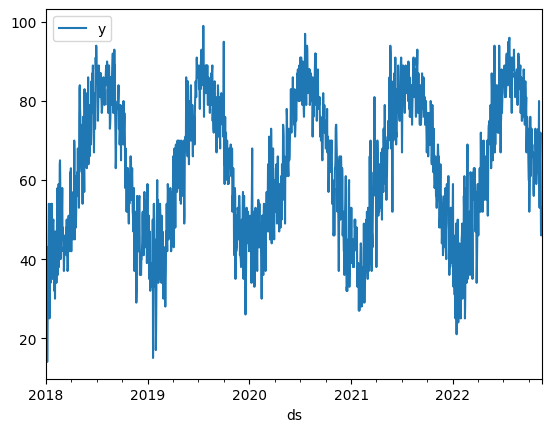

In [64]:
weather["2018-01-01":].plot("ds","y")

In [60]:
from prophet.plot import plot_plotly, plot_components_plotly, plot_cross_validation_metric
plot_components_plotly(m, predictions)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'line': {'color': '#0072B2', 'width': 2},
              'mode': 'lines',
              'name': 'trend',
              'type': 'scatter',
              'x': array(['2022-01-01T00:00:00.000000000', '2022-01-02T00:00:00.000000000',
                          '2022-01-03T00:00:00.000000000', ..., '2022-11-15T00:00:00.000000000',
                          '2022-11-16T00:00:00.000000000', '2022-11-17T00:00:00.000000000'],
                         shape=(321,), dtype='datetime64[ns]'),
              'xaxis': 'x',
              'y': {'bdata': ('AfIKEQu7TkA11drgA7tOQGi4qrD8uk' ... 'tHNR2yTkBWDhcFFrJOQInx5tQOsk5A'),
                    'dtype': 'f8'},
              'yaxis': 'y'},
             {'line': {'color': 'rgba(0, 114, 178, 0.2)', 'width': 0},
              'mode': 'lines',
              'name': 'trend_upper',
              'type': 'scatter',
              'x': array(['2022-01-01T00:00:00.000000000', '2022-01-02T00:00:00.000000000',
                          '2022-01-03T00:00:00.000000000', ..., '2022-11-15T00:00:00.000000000',
                          '2022-11-16T00:00:00.000000000', '2022-11-17T00:00:00.000000000'],
                         shape=(321,), dtype='datetime64[ns]'),
              'xaxis': 'x',
              'y': {'bdata': ('AfIKEQu7TkA11drgA7tOQGi4qrD8uk' ... 'LQ6Hi0TkDRY2FNfLROQNqE8rF/tE5A'),
                    'dtype': 'f8'},
              'yaxis': 'y'},
             {'fill': 'tonexty',
              'fillcolor': 'rgba(0, 114, 178, 0.2)',
              'line': {'color': 'rgba(0, 114, 178, 0.2)', 'width': 0},
              'mode': 'lines',
              'name': 'trend_lower',
              'type': 'scatter',
              'x': array(['2022-01-01T00:00:00.000000000', '2022-01-02T00:00:00.000000000',
                          '2022-01-03T00:00:00.000000000', ..., '2022-11-15T00:00:00.000000000',
                          '2022-11-16T00:00:00.000000000', '2022-11-17T00:00:00.000000000'],
                         shape=(321,), dtype='datetime64[ns]'),
              'xaxis': 'x',
              'y': {'bdata': ('AfIKEQu7TkA11drgA7tOQGi4qrD8uk' ... 'sy4byvTkDv9Fp0ra9OQDOYD4aer05A'),
                    'dtype': 'f8'},
              'yaxis': 'y'},
             {'line': {'color': '#0072B2', 'width': 2},
              'mode': 'lines',
              'name': 'extra_regressors_additive',
              'type': 'scatter',
              'x': array(['2022-01-01T00:00:00.000000000', '2022-01-02T00:00:00.000000000',
                          '2022-01-03T00:00:00.000000000', ..., '2022-11-15T00:00:00.000000000',
                          '2022-11-16T00:00:00.000000000', '2022-11-17T00:00:00.000000000'],
                         shape=(321,), dtype='datetime64[ns]'),
              'xaxis': 'x2',
              'y': {'bdata': ('bfwizRUB+r/d4ifCVWgQwN0r5B7Wni' ... 'IoUUt0IcCat+oThi4cwHVq1h7WkB/A'),
                    'dtype': 'f8'},
              'yaxis': 'y2'},
             {'line': {'color': '#0072B2', 'width': 2},
              'mode': 'lines',
              'name': 'yearly',
              'type': 'scatter',
              'x': array(['2017-01-01T00:00:00.000000000', '2017-01-02T00:00:59.178082304',
                          '2017-01-03T00:01:58.356164352', ..., '2017-12-29T05:57:02.465753344',
                          '2017-12-30T05:58:01.643835648', '2017-12-31T05:59:00.821917696'],
                         shape=(365,), dtype='datetime64[ns]'),
              'xaxis': 'x3',
              'y': {'bdata': ('IQ5dQMpdH8BQuZRyAYcfwMZexHwjrh' ... 'VJ1R7AouSaLvoEH8CGnfUBdjIfwA=='),
                    'dtype': 'f8'},
              'yaxis': 'y3'},
             {'line': {'color': '#0072B2', 'width': 2},
              'mode': 'lines',
              'name': 'weekly',
              'type': 'scatter',
              'x': array(['2017-01-01T00:00:00.000000000', '2017-01-02T00:00:00.000000000',
                          '2017-01-03T00:00:00.000000000', '2017-01-04T00:00:00.000000000',
                          '2017-01-05T00:0

In [65]:
from prophet.utilities import regressor_coefficients
regressor_coefficients(m)

regressor regressor_mode     center  coef_lower      coef  coef_upper
0    prcp_x       additive   0.118130   -0.197572 -0.197572   -0.197572
1    snow_x       additive   0.064540   -0.010734 -0.010734   -0.010734
2    snwd_x       additive   0.209635    0.062702  0.062702    0.062702
3    tmax_x       additive  61.758648    0.012456  0.012456    0.012456
4    tmin_x       additive  47.494024   -0.083664 -0.083664   -0.083664
5    prcp_y       additive   0.123378   -0.320029 -0.320029   -0.320029
6    snow_y       additive   0.071347   -0.492390 -0.492390   -0.492390
7    snwd_y       additive   0.217759   -0.200792 -0.200792   -0.200792
8    tmax_y       additive  62.609277    0.281447  0.281447    0.281447
9    tmin_y       additive  48.923130    0.427080  0.427080    0.427080

In [66]:
predictions.index = test.index
predictions["actual"] = test["y"]

In [68]:
def mse(predictions, actual_label="actual", predicted_label="yhat"):
    se = ((predictions[actual_label] - predictions[predicted_label]) ** 2)
    print("MSE:", se.mean())

mse(predictions)

MSE: 40.63500979533158


In [69]:
from prophet.diagnostics import cross_validation

m = fit_prophet(weather)
cv = cross_validation(m, initial=f"{365*5} days", period="180 days", horizon = "180 days", parallel="processes")

10:11:11 - cmdstanpy - INFO - Chain [1] start processing
10:11:16 - cmdstanpy - INFO - Chain [1] done processing


In [71]:
mse(cv, actual_label="y")

MSE: 36.18278337946833


<Axes: >

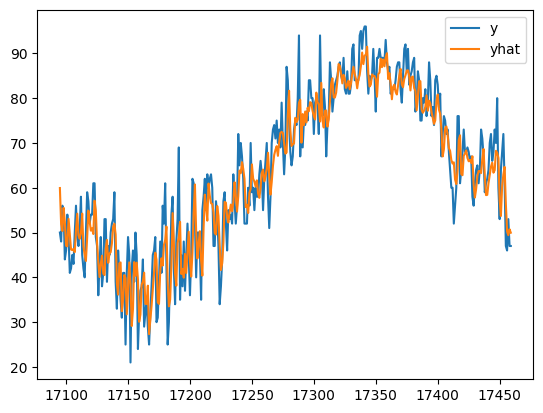

In [73]:
cv[["y", "yhat"]][-365:].plot()

In [74]:
m =fit_prophet(weather)
m.predict(weather.iloc[-1:])

10:21:30 - cmdstanpy - INFO - Chain [1] start processing
10:21:35 - cmdstanpy - INFO - Chain [1] done processing


ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 2022-11-17  61.668094   42.342451   57.392414    61.668094    61.668094   

   additive_terms  additive_terms_lower  additive_terms_upper  \
0      -11.531385            -11.531385            -11.531385   

   extra_regressors_additive  ...    weekly  weekly_lower  weekly_upper  \
0                  -7.905366  ... -0.065218     -0.065218     -0.065218   

     yearly  yearly_lower  yearly_upper  multiplicative_terms  \
0 -3.560801     -3.560801     -3.560801                   0.0   

   multiplicative_terms_lower  multiplicative_terms_upper       yhat  
0                         0.0                         0.0  50.136709  

[1 rows x 52 columns]

In [75]:
m = Prophet()
m.fit(weather)
future = m.make_future_dataframe(periods=365)

10:22:39 - cmdstanpy - INFO - Chain [1] start processing
10:22:40 - cmdstanpy - INFO - Chain [1] done processing


In [77]:
forecast= m.predict(future)

In [78]:
plot_plotly(m, forecast)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'marker': {'color': 'black', 'size': 4},
              'mode': 'markers',
              'name': 'Actual',
              'type': 'scatter',
              'x': array(['1970-01-01T00:00:00.000000000', '1970-01-02T00:00:00.000000000',
                          '1970-01-03T00:00:00.000000000', ..., '2022-11-15T00:00:00.000000000',
                          '2022-11-16T00:00:00.000000000', '2022-11-17T00:00:00.000000000'],
                         shape=(19314,), dtype='datetime64[ns]'),
              'y': {'bdata': ('AAAAAAAAP0AAAAAAAABDQAAAAAAAAD' ... 'AAAACASkAAAAAAAIBHQAAAAAAAgEdA'),
                    'dtype': 'f8'}},
             {'hoverinfo': 'skip',
              'line': {'width': 0},
              'mode': 'lines',
              'type': 'scatter',
              'x': array(['1970-01-01T00:00:00.000000000', '1970-01-02T00:00:00.000000000',
                          '1970-01-03T00:00:00.000000000', ..., '2023-11-15T00:00:00.000000000',
                          '2023-11-16T00:00:00.000000000', '2023-11-17T00:00:00.000000000'],
                         shape=(19679,), dtype='datetime64[ns]'),
              'y': {'bdata': ('FNb7JV9CPkDo/8/Fb6Q+QMjSC/U22D' ... 'BOd0ZAyUgNMIq/RkB60dnwQYRGQA=='),
                    'dtype': 'f8'}},
             {'fill': 'tonexty',
              'fillcolor': 'rgba(0, 114, 178, 0.2)',
              'line': {'color': '#0072B2', 'width': 2},
              'mode': 'lines',
              'name': 'Predicted',
              'type': 'scatter',
              'x': array(['1970-01-01T00:00:00.000000000', '1970-01-02T00:00:00.000000000',
                          '1970-01-03T00:00:00.000000000', ..., '2023-11-15T00:00:00.000000000',
                          '2023-11-16T00:00:00.000000000', '2023-11-17T00:00:00.000000000'],
                         shape=(19679,), dtype='datetime64[ns]'),
              'y': {'bdata': ('kK1UFlMpREB49Amm2xNEQAh1GKHT80' ... 'q+p0tAPo4h65uCS0AVeADZdVVLQA=='),
                    'dtype': 'f8'}},
             {'fill': 'tonexty',
              'fillcolor': 'rgba(0, 114, 178, 0.2)',
              'hoverinfo': 'skip',
              'line': {'width': 0},
              'mode': 'lines',
              'type': 'scatter',
              'x': array(['1970-01-01T00:00:00.000000000', '1970-01-02T00:00:00.000000000',
                          '1970-01-03T00:00:00.000000000', ..., '2023-11-15T00:00:00.000000000',
                          '2023-11-16T00:00:00.000000000', '2023-11-17T00:00:00.000000000'],
                         shape=(19679,), dtype='datetime64[ns]'),
              'y': {'bdata': ('BOPkUrfhSEChG4+341xJQKSBYpHzdE' ... 'UxP1BAwXRyXKUTUED6GCjgz/dPQA=='),
                    'dtype': 'f8'}}],
    'layout': {'height': 600,
               'showlegend': False,
               'template': '...',
               'width': 900,
               'xaxis': {'rangeselector': {'buttons': [{'count': 7, 'label': '1w', 'step': 'day', 'stepmode': 'backward'},
                                                       {'count': 1,
                                                        'label': '1m',
                                                        'step': 'month',
                                                        'stepmode': 'backward'},
                                                       {'count': 6,
                                                        'label': '6m',
                                                        'step': 'month',
                                                        'stepmode': 'backward'},
                                                       {'count': 1, 'label': '1y', 'step': 'year', 'stepmode': 'backward'},
                                                       {'step': 'all'}]},
                         'rangeslider': {'visible': True},
                         'title': {'text': 'ds'},
                         'type': 'date'},
               'yaxis': {'title': {'text': 'y'}}}
})